# Price-Prediction-for-Used-Cars-Datascience-Project
This project uses machine learning to predict the price of a used car. The model is trained on a dataset of historical car sales data, and it can then be used to predict the price of a car based on its features.
# Problem Statement:
The problem statement for this project is to predict the price of a used car based on a set of features, such as the years used, mileage, engine,power,kilometers driven and no. of seats.
# Solution approach:
A machine learning model can be used to predict used car prices by considering a variety of factors. The model can be trained on a dataset of historical car sales data, and it can then be used to predict the price of a car based on its features.
# Observations :
The following observations were made during the course of this project:

* The manfacturer Location of the car is the most important features for predicting the price of a used car.
* The no. of years the car used has a negative on the price.
* The mileage of the car also has impact on the price.
* The power of the car has impact on the price.
* The engine of the car has impact on the price.
* The no. of seats the car has impact on the price.
* The Kilometers the car driven has small impact on the price
# Insights:
The insights from this project can be used by car dealerships, car buyers, and other businesses that are involved in the used car market. These insights can help these businesses to make more informed decisions about the pricing of used cars. For example, car dealerships can use these insights to set more competitive prices for their used cars. Car buyers can use these insights to get a better deal on a used car. And other businesses that are involved in the used car market can use these insights to improve their operations.# Price-Prediction-for-Used-Cars-Datascience-Project

This project uses machine learning to predict the price of a used car. The model is trained on a dataset of historical car sales data, and it can then be used to predict the price of a car based on its features.

In [1]:
#import libraries and dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train-data.csv')

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.shape

(6019, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
df.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [7]:
df.drop(['Unnamed: 0','New_Price'],axis = 1,inplace = True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [8]:
df=df.dropna()
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [9]:
#after drop null value handle index by reset
df=df.reset_index(drop=True)
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [10]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [11]:
for i in range(df.shape[0]):
    df.at[i,'Company'] = df['Name'][i].split()[0]
    df.at[i,'Mileage(km/kg)'] = df['Mileage'][i].split()[0]
    df.at[i,'Engine(cc)'] = df['Engine'][i].split()[0]
    df.at[i,'Power(bhp)'] = df['Power'][i].split()[0]
    

In [12]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Company,Mileage(km/kg),Engine(cc),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Maruti,26.6,998,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Hyundai,19.67,1582,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Honda,18.2,1199,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Maruti,20.77,1248,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,Audi,15.2,1968,140.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Maruti,28.4,1248,74
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Hyundai,24.4,1120,71
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Mahindra,14.0,2498,112
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Maruti,18.9,998,67.1


In [13]:
df.drop(['Name','Mileage','Engine','Power'],axis = 1, inplace = True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(cc),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.6,998,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582,126.2
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.2,1199,88.7
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.2,1968,140.8
...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,28.4,1248,74
5971,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,24.4,1120,71
5972,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,14.0,2498,112
5973,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,18.9,998,67.1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Seats              5975 non-null   float64
 7   Price              5975 non-null   float64
 8   Company            5975 non-null   object 
 9   Mileage(km/kg)     5975 non-null   object 
 10  Engine(cc)         5975 non-null   object 
 11  Power(bhp)         5975 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 560.3+ KB


In [15]:
df['Mileage(km/kg)'] = df['Mileage(km/kg)'].astype(float)
df['Engine(cc)'] = df['Engine(cc)'].astype(float)

In [16]:
df[df['Power(bhp)'] == 'null']

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(cc),Power(bhp)
76,Jaipur,2008,111111,Diesel,Manual,First,5.0,2.00,Ford,17.80,1399.0,null
79,Hyderabad,2005,87591,Petrol,Manual,First,5.0,1.30,Hyundai,0.00,1086.0,null
89,Hyderabad,2007,73745,Petrol,Manual,First,5.0,2.10,Hyundai,17.00,1086.0,null
120,Mumbai,2005,102000,Petrol,Manual,Second,5.0,0.85,Hyundai,17.00,1086.0,null
143,Kochi,2008,80759,Petrol,Manual,Third,5.0,1.67,Hyundai,17.00,1086.0,null
...,...,...,...,...,...,...,...,...,...,...,...,...
5818,Chennai,2007,79000,Petrol,Manual,First,5.0,1.85,Hyundai,17.00,1086.0,null
5830,Pune,2006,47200,Petrol,Manual,Second,5.0,1.20,Hyundai,17.00,1086.0,null
5881,Pune,2010,85000,Petrol,Manual,First,5.0,2.85,Skoda,17.50,1798.0,null
5899,Chennai,2002,75000,Diesel,Manual,First,6.0,1.70,Mahindra,0.00,2112.0,null


In [17]:
# df.drop(index = df[df['Power(bhp)'] == 'null'].index,inplace = True)

In [18]:
count = 0
position = []
for i in range(df.shape[0]):
    if df['Power(bhp)'][i] == 'null':
        count = count+1
        position.append(i)

In [19]:
position

[76,
 79,
 89,
 120,
 143,
 225,
 242,
 259,
 304,
 305,
 383,
 421,
 425,
 440,
 469,
 572,
 628,
 644,
 645,
 735,
 744,
 824,
 910,
 921,
 929,
 1063,
 1138,
 1148,
 1266,
 1313,
 1338,
 1380,
 1411,
 1546,
 1569,
 1640,
 1663,
 1848,
 1989,
 2043,
 2118,
 2152,
 2250,
 2254,
 2292,
 2328,
 2377,
 2425,
 2434,
 2481,
 2485,
 2511,
 2561,
 2579,
 2616,
 2621,
 2868,
 3010,
 3038,
 3081,
 3166,
 3224,
 3266,
 3414,
 3491,
 3506,
 3562,
 3601,
 3611,
 3618,
 3642,
 3706,
 3868,
 3900,
 3969,
 4046,
 4049,
 4318,
 4321,
 4593,
 4672,
 4676,
 4706,
 4792,
 4848,
 4862,
 4914,
 5024,
 5078,
 5186,
 5383,
 5395,
 5415,
 5486,
 5490,
 5604,
 5712,
 5716,
 5818,
 5830,
 5881,
 5899,
 5941]

In [20]:
df = df.drop(df.index[position])
df = df.reset_index(drop=True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(cc),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.2
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.7
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.8
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,28.40,1248.0,74
5868,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,24.40,1120.0,71
5869,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,14.00,2498.0,112
5870,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,18.90,998.0,67.1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(cc)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 550.6+ KB


In [22]:
df['Power(bhp)'] = df['Power(bhp)'].astype(float)

In [23]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(cc),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,15.20,1968.0,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,28.40,1248.0,74.00
5868,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,24.40,1120.0,71.00
5869,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,14.00,2498.0,112.00
5870,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,18.90,998.0,67.10


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(cc)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 550.6+ KB


In [25]:
df['Location'].value_counts()

Location
Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: count, dtype: int64

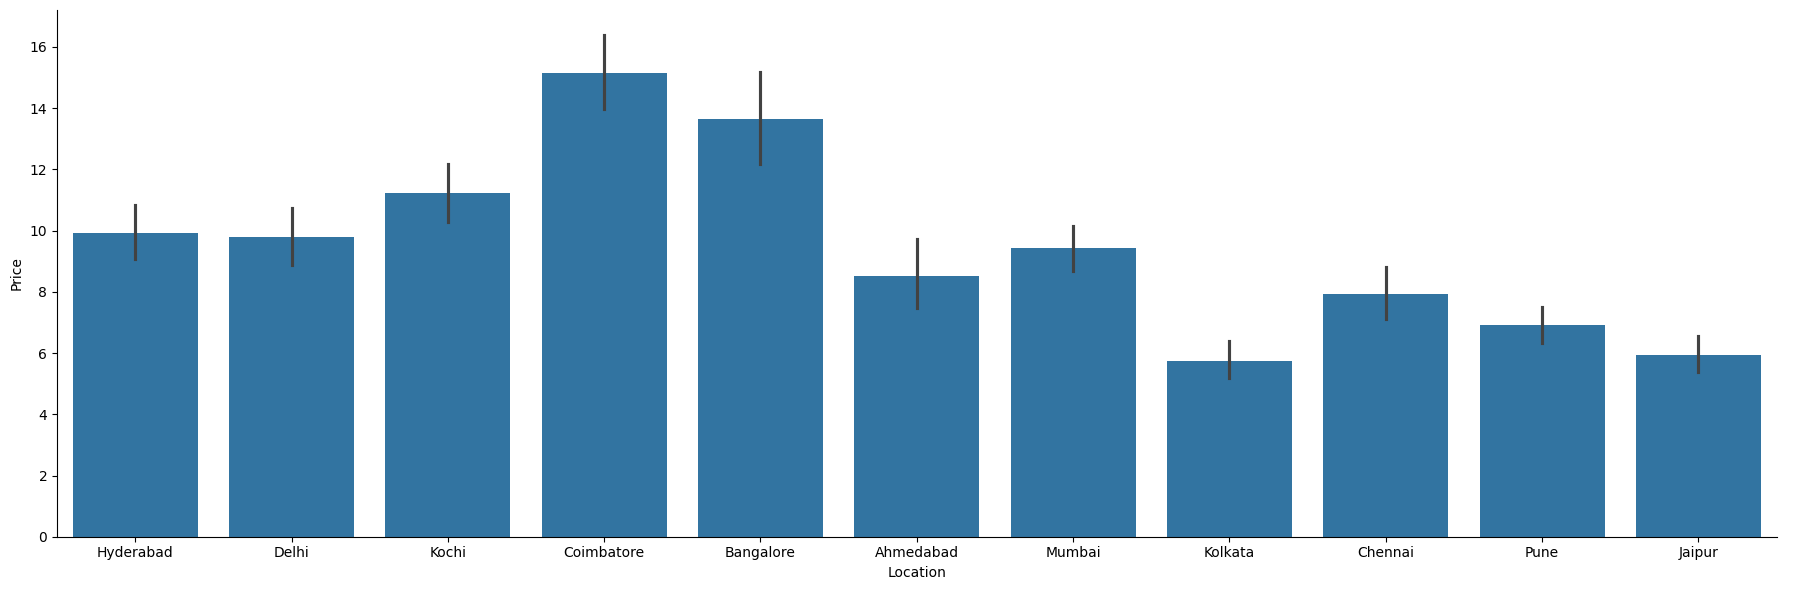

In [26]:
#plot vs location
#kind = 'boxen'
sns.catplot(y = 'Price', x = "Location", data = df.sort_values('Price',ascending = False),kind = 'bar',height = 6,aspect=3)
plt.show()

#### On-hot encoding for Location

In [27]:
Location = df[['Location']]
Location = pd.get_dummies(Location)
Location

,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
5867,False,False,False,False,True,False,False,False,False,False,False
5868,False,False,False,False,False,False,True,False,False,False,False
5869,False,False,False,False,False,False,True,False,False,False,False
5870,False,False,False,False,False,False,False,False,True,False,False


In [28]:
df['Fuel_Type'].value_counts()

Fuel_Type
Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: count, dtype: int64

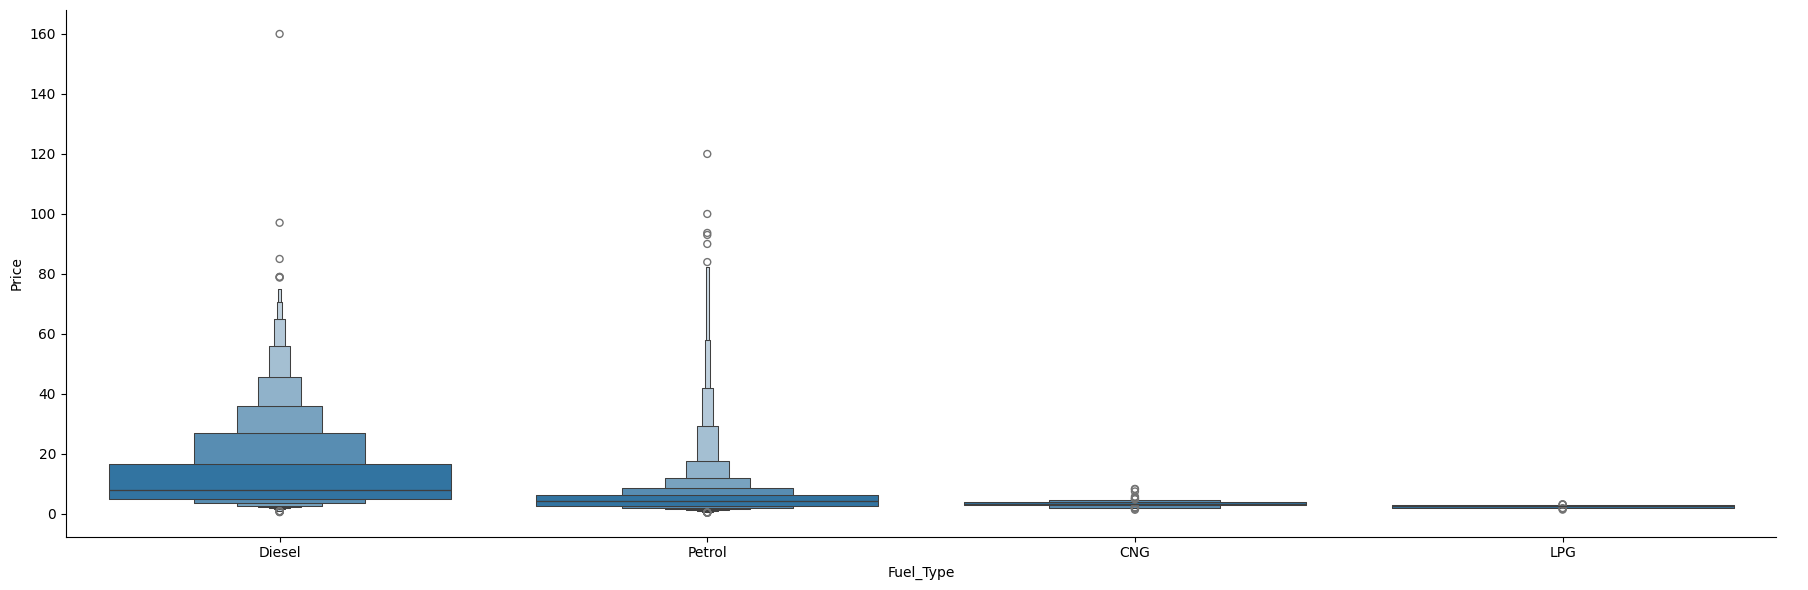

In [29]:
sns.catplot(y = 'Price',x = 'Fuel_Type',data = df.sort_values('Price',ascending = False),kind = 'boxen',height = 6,aspect =3)
plt.show()

#### On-hot encoding for Fuel_Type

In [30]:
Fuel_t = df[['Fuel_Type']]
Fuel_t = pd.get_dummies(Fuel_t)
Fuel_t

,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,True,False,False,False
1,False,True,False,False
2,False,False,False,True
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
5867,False,True,False,False
5868,False,True,False,False
5869,False,True,False,False
5870,False,False,False,True


In [31]:
df['Transmission'].value_counts()

Transmission
Manual       4170
Automatic    1702
Name: count, dtype: int64

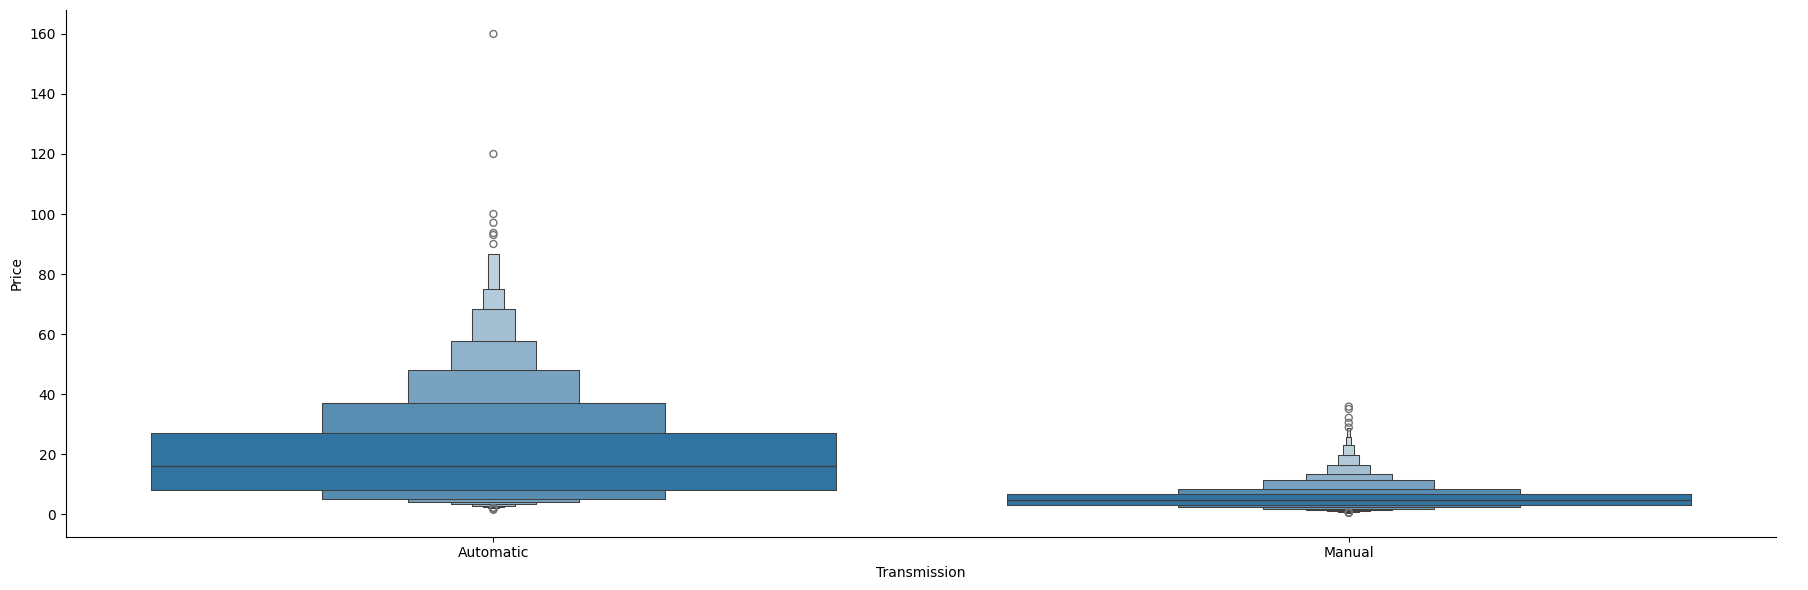

In [32]:
sns.catplot(y='Price',x = 'Transmission',data = df.sort_values('Price',ascending = False),kind ='boxen',height = 6,aspect = 3)
plt.show()

### On-hot encoding for Transmission

In [33]:
Transmission = df[['Transmission']]
Transmission = pd.get_dummies(Transmission,drop_first = True)
Transmission

,Transmission_Manual
0,True
1,True
2,True
3,True
4,False
...,...
5867,True
5868,True
5869,True
5870,True


In [34]:
df['Owner_Type'].value_counts()

Owner_Type
First             4839
Second             925
Third              101
Fourth & Above       7
Name: count, dtype: int64

In [35]:
df['Owner_Type'].replace({
    'First':4,
    'Second':3,
    'Third':2,
    'Fourth & Above':1
},inplace = True)
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(cc),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,4,5.0,1.75,Maruti,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,4,5.0,12.50,Hyundai,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,4,5.0,4.50,Honda,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,4,7.0,6.00,Maruti,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,3,5.0,17.74,Audi,15.20,1968.0,140.80
...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,4,5.0,4.75,Maruti,28.40,1248.0,74.00
5868,Jaipur,2015,100000,Diesel,Manual,4,5.0,4.00,Hyundai,24.40,1120.0,71.00
5869,Jaipur,2012,55000,Diesel,Manual,3,8.0,2.90,Mahindra,14.00,2498.0,112.00
5870,Kolkata,2013,46000,Petrol,Manual,4,5.0,2.65,Maruti,18.90,998.0,67.10


In [36]:
df['Owner_Type'].value_counts()

Owner_Type
4    4839
3     925
2     101
1       7
Name: count, dtype: int64

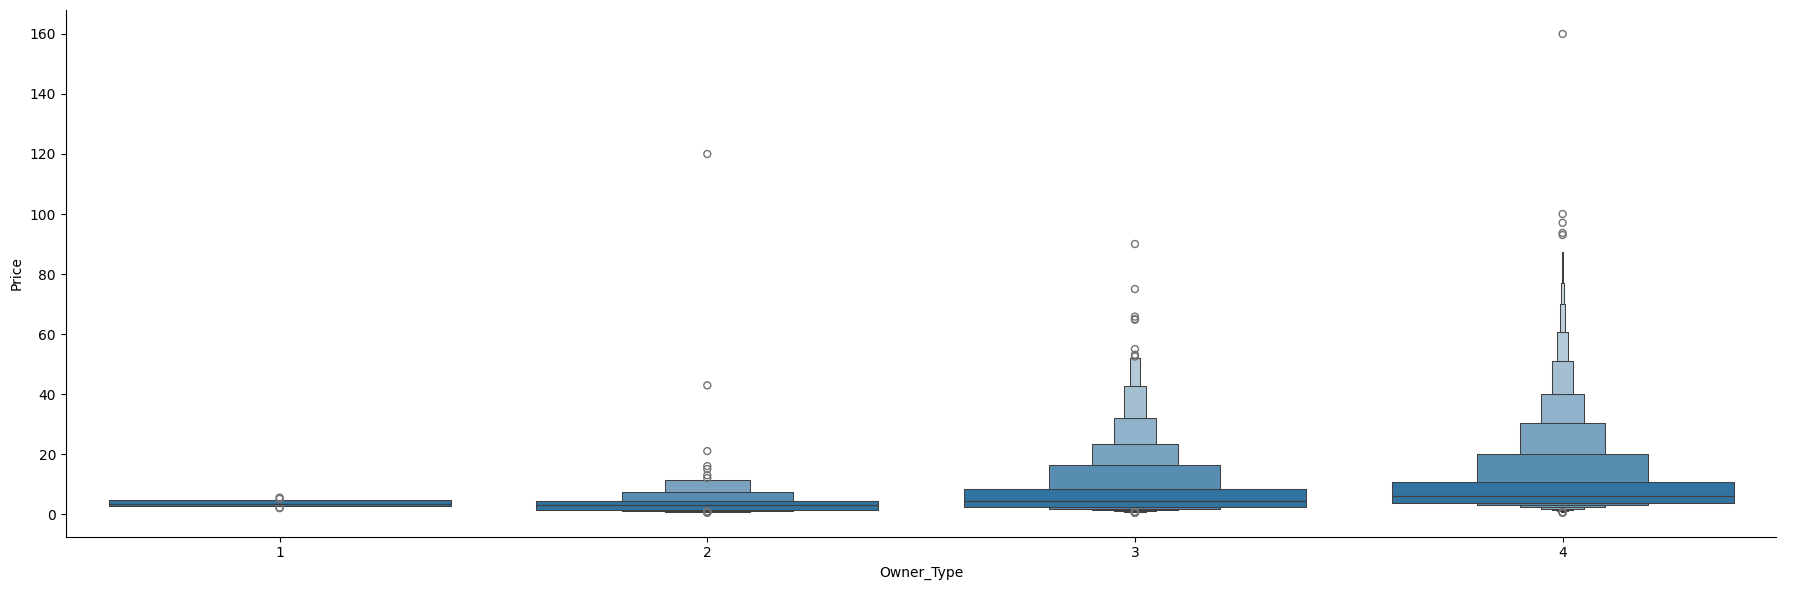

In [37]:
sns.catplot(y='Price',x = 'Owner_Type',data = df.sort_values('Price',ascending = False),kind ='boxen',height = 6,aspect = 3)
plt.show()

### As Owner_Type column has ordered data so Label Encoding Here

In [38]:
df['Company'].value_counts()

Company
Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: count, dtype: int64

In [39]:
df.drop(['Company'],axis =1,inplace = True)

In [40]:
df

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(cc),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,4,5.0,1.75,26.60,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,4,5.0,12.50,19.67,1582.0,126.20
2,Chennai,2011,46000,Petrol,Manual,4,5.0,4.50,18.20,1199.0,88.70
3,Chennai,2012,87000,Diesel,Manual,4,7.0,6.00,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,3,5.0,17.74,15.20,1968.0,140.80
...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,4,5.0,4.75,28.40,1248.0,74.00
5868,Jaipur,2015,100000,Diesel,Manual,4,5.0,4.00,24.40,1120.0,71.00
5869,Jaipur,2012,55000,Diesel,Manual,3,8.0,2.90,14.00,2498.0,112.00
5870,Kolkata,2013,46000,Petrol,Manual,4,5.0,2.65,18.90,998.0,67.10


### Now Concat all the encoding data train data

In [41]:
final_data = pd.concat([df,Location,Fuel_t,Transmission],axis =1)
final_data

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(cc),...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,4,5.0,1.75,26.60,998.0,...,False,False,False,True,False,True,False,False,False,True
1,Pune,2015,41000,Diesel,Manual,4,5.0,12.50,19.67,1582.0,...,False,False,False,False,True,False,True,False,False,True
2,Chennai,2011,46000,Petrol,Manual,4,5.0,4.50,18.20,1199.0,...,False,False,False,False,False,False,False,False,True,True
3,Chennai,2012,87000,Diesel,Manual,4,7.0,6.00,20.77,1248.0,...,False,False,False,False,False,False,True,False,False,True
4,Coimbatore,2013,40670,Diesel,Automatic,3,5.0,17.74,15.20,1968.0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Delhi,2014,27365,Diesel,Manual,4,5.0,4.75,28.40,1248.0,...,False,False,False,False,False,False,True,False,False,True
5868,Jaipur,2015,100000,Diesel,Manual,4,5.0,4.00,24.40,1120.0,...,True,False,False,False,False,False,True,False,False,True
5869,Jaipur,2012,55000,Diesel,Manual,3,8.0,2.90,14.00,2498.0,...,True,False,False,False,False,False,True,False,False,True
5870,Kolkata,2013,46000,Petrol,Manual,4,5.0,2.65,18.90,998.0,...,False,False,True,False,False,False,False,False,True,True


In [42]:
final_data.drop(['Location','Fuel_Type','Transmission'],axis=1,inplace=True)
final_data

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(cc),Power(bhp),Location_Ahmedabad,Location_Bangalore,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,4,5.0,1.75,26.60,998.0,58.16,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2015,41000,4,5.0,12.50,19.67,1582.0,126.20,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2011,46000,4,5.0,4.50,18.20,1199.0,88.70,False,False,...,False,False,False,False,False,False,False,False,True,True
3,2012,87000,4,7.0,6.00,20.77,1248.0,88.76,False,False,...,False,False,False,False,False,False,True,False,False,True
4,2013,40670,3,5.0,17.74,15.20,1968.0,140.80,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,4,5.0,4.75,28.40,1248.0,74.00,False,False,...,False,False,False,False,False,False,True,False,False,True
5868,2015,100000,4,5.0,4.00,24.40,1120.0,71.00,False,False,...,True,False,False,False,False,False,True,False,False,True
5869,2012,55000,3,8.0,2.90,14.00,2498.0,112.00,False,False,...,True,False,False,False,False,False,True,False,False,True
5870,2013,46000,4,5.0,2.65,18.90,998.0,67.10,False,False,...,False,False,True,False,False,False,False,False,True,True


In [43]:
price=final_data['Price']
final_data.drop('Price',axis=1,inplace=True)
final_data['Price'] = price
final_data

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(cc),Power(bhp),Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Price
0,2010,72000,4,5.0,26.60,998.0,58.16,False,False,False,...,False,False,True,False,True,False,False,False,True,1.75
1,2015,41000,4,5.0,19.67,1582.0,126.20,False,False,False,...,False,False,False,True,False,True,False,False,True,12.50
2,2011,46000,4,5.0,18.20,1199.0,88.70,False,False,True,...,False,False,False,False,False,False,False,True,True,4.50
3,2012,87000,4,7.0,20.77,1248.0,88.76,False,False,True,...,False,False,False,False,False,True,False,False,True,6.00
4,2013,40670,3,5.0,15.20,1968.0,140.80,False,False,False,...,False,False,False,False,False,True,False,False,False,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,4,5.0,28.40,1248.0,74.00,False,False,False,...,False,False,False,False,False,True,False,False,True,4.75
5868,2015,100000,4,5.0,24.40,1120.0,71.00,False,False,False,...,False,False,False,False,False,True,False,False,True,4.00
5869,2012,55000,3,8.0,14.00,2498.0,112.00,False,False,False,...,False,False,False,False,False,True,False,False,True,2.90
5870,2013,46000,4,5.0,18.90,998.0,67.10,False,False,False,...,False,True,False,False,False,False,False,True,True,2.65


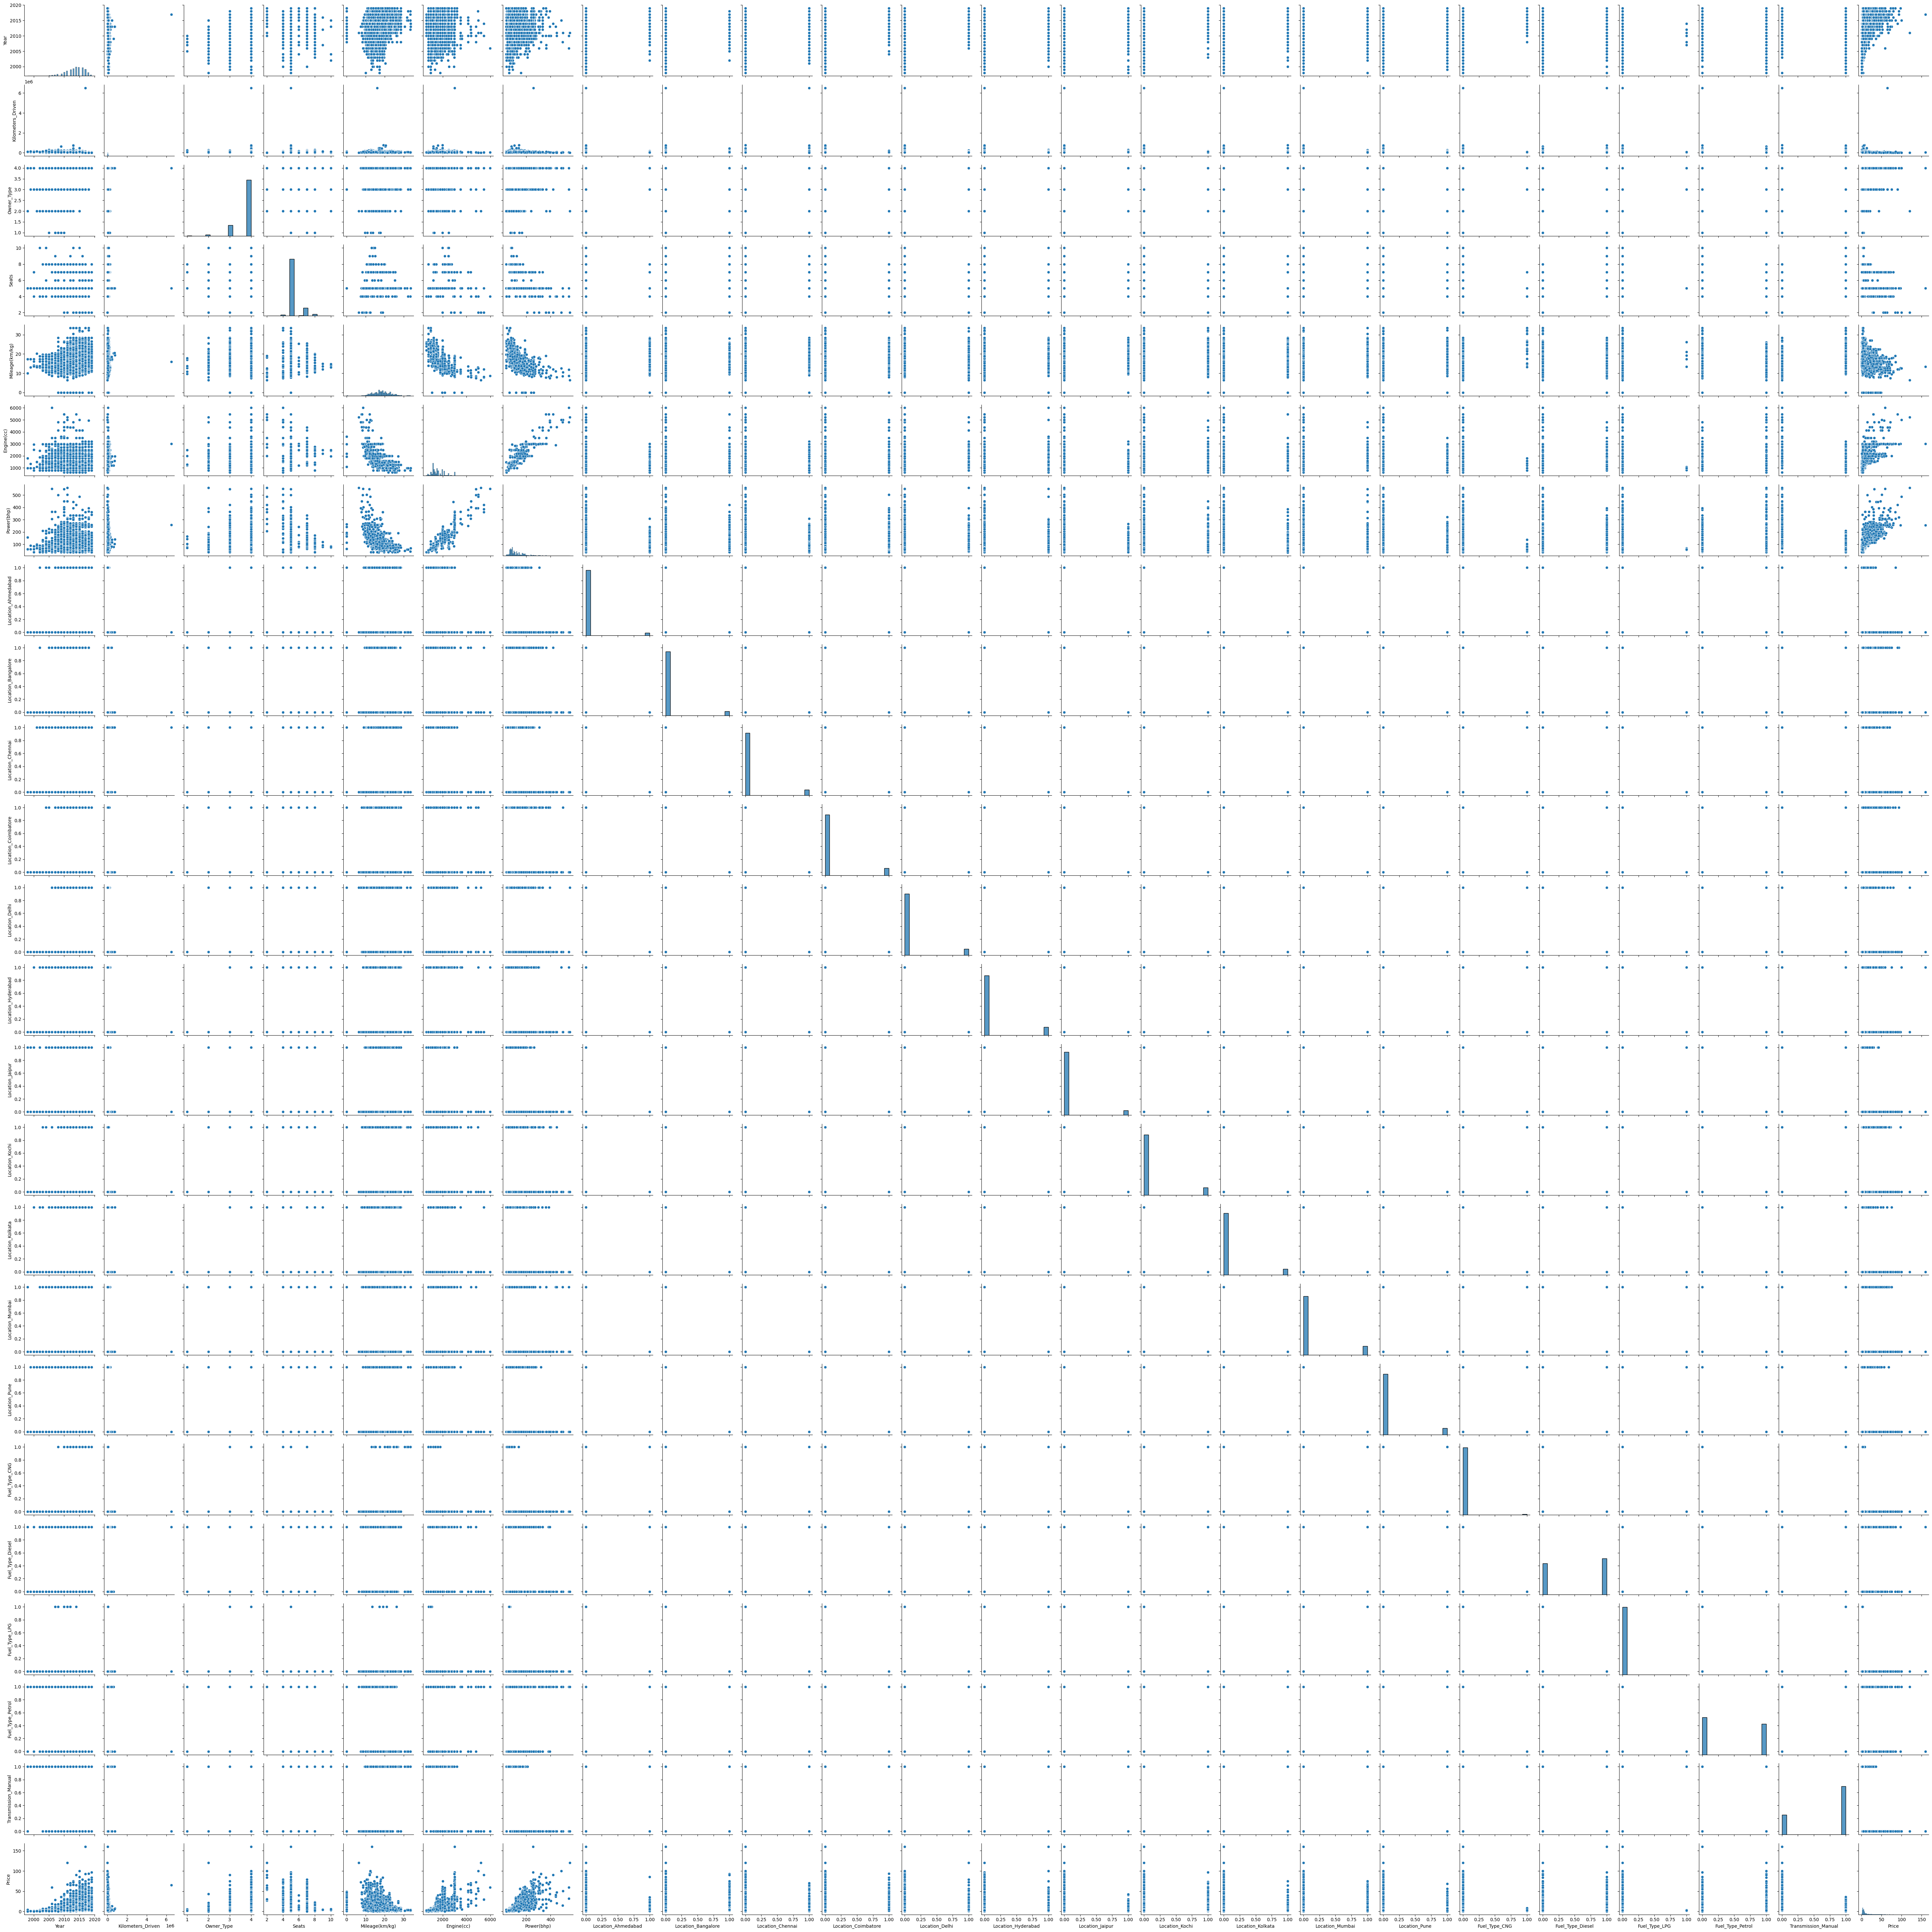

In [44]:
sns.pairplot(final_data)

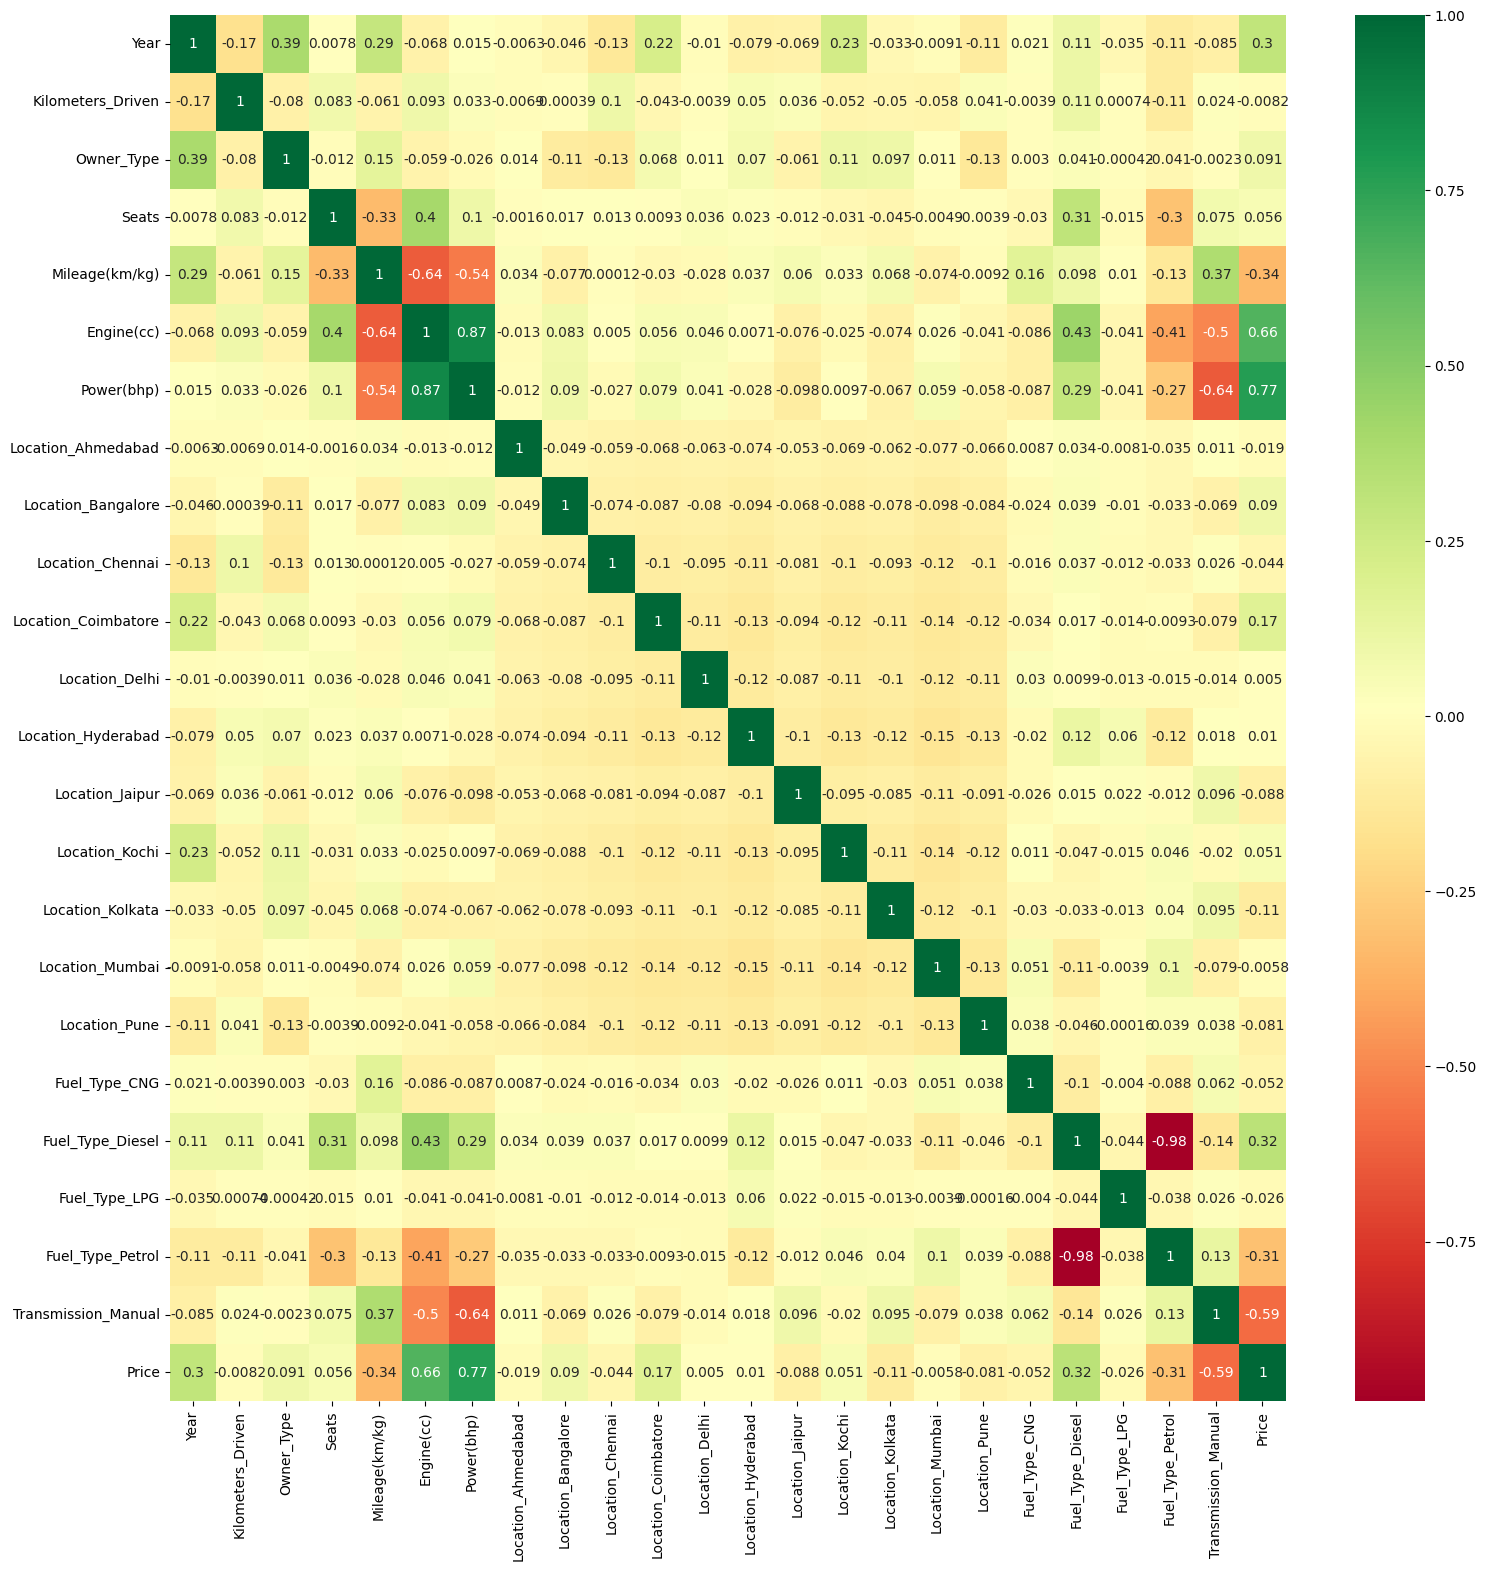

In [45]:
plt.figure(figsize = (18,18))
sns.heatmap(final_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

# Machine Learning Part

## Final Features Selection

In [46]:
X = final_data.drop('Price',axis =1)

In [47]:
X

,Year,Kilometers_Driven,Owner_Type,Seats,Mileage(km/kg),Engine(cc),Power(bhp),Location_Ahmedabad,Location_Bangalore,Location_Chennai,...,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,4,5.0,26.60,998.0,58.16,False,False,False,...,False,False,False,True,False,True,False,False,False,True
1,2015,41000,4,5.0,19.67,1582.0,126.20,False,False,False,...,False,False,False,False,True,False,True,False,False,True
2,2011,46000,4,5.0,18.20,1199.0,88.70,False,False,True,...,False,False,False,False,False,False,False,False,True,True
3,2012,87000,4,7.0,20.77,1248.0,88.76,False,False,True,...,False,False,False,False,False,False,True,False,False,True
4,2013,40670,3,5.0,15.20,1968.0,140.80,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,2014,27365,4,5.0,28.40,1248.0,74.00,False,False,False,...,False,False,False,False,False,False,True,False,False,True
5868,2015,100000,4,5.0,24.40,1120.0,71.00,False,False,False,...,True,False,False,False,False,False,True,False,False,True
5869,2012,55000,3,8.0,14.00,2498.0,112.00,False,False,False,...,True,False,False,False,False,False,True,False,False,True
5870,2013,46000,4,5.0,18.90,998.0,67.10,False,False,False,...,False,False,True,False,False,False,False,False,True,True


In [48]:
y=final_data['Price']
y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
5867     4.75
5868     4.00
5869     2.90
5870     2.65
5871     2.50
Name: Price, Length: 5872, dtype: float64

### This code is also used to understand how important each feature is.
`from sklearn.ensemble import ExtraTreesRegressor`

In [50]:
#now import and apply to my code 
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

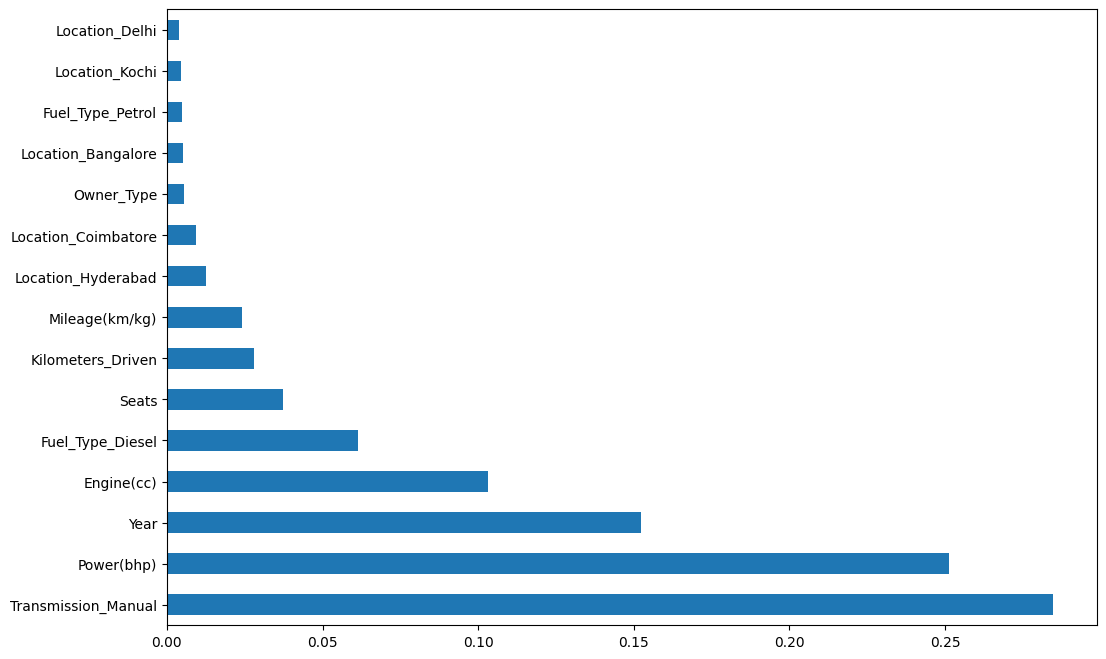

In [54]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

#### For train and test

In [55]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predict =lr.predict(x_test)
print("Accuracy on Traing set: ",lr.score(X_train,y_train))
print("Accuracy on Testing set: ",lr.score(x_test,y_test))

Accuracy on Traing set:  0.7005621804529991
Accuracy on Testing set:  0.7256102038308838


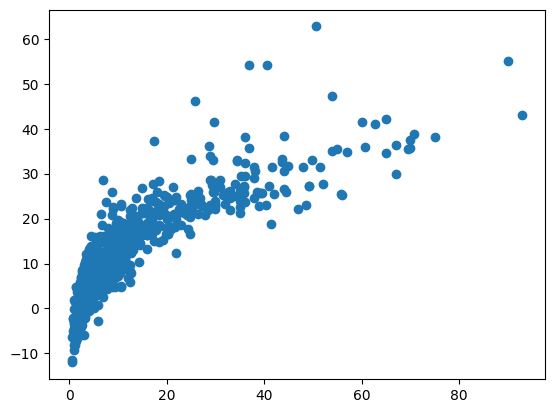

In [60]:
predictions=lr.predict(x_test)
plt.scatter(y_test,predictions);

#### using Lasso regression

In [61]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50,tol=0.1)
lasso_reg.fit(X_train,y_train)
lasso_reg.score(x_test,y_test)

0.6015357172320286

In [62]:
lasso_reg.score(X_train,y_train)

0.5660346756034437

#### Using Ridge Reg

In [63]:
from sklearn.linear_model import Ridge
#ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg= Ridge(alpha=50, tol=0.1)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=50, tol=0.1)

In [64]:
ridge_reg.score(X_train, y_train)

0.7003062403918462

In [65]:
ridge_reg.score(x_test, y_test)

0.7253416926366936

#### Using DecisionTree Reg

In [69]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)

y_predict = dt_reg.predict(x_test)
print("Accuracy on Traing set: ",dt_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",dt_reg.score(x_test,y_test))

Accuracy on Traing set:  0.9999957727341057
Accuracy on Testing set:  0.8362467057876835


In [70]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(DecisionTreeRegressor(), X,y,cv=5)
result

array([0.80741339, 0.71266953, 0.80135428, 0.74218939, 0.7915461 ])

In [71]:
result.mean()

np.float64(0.7710345369504152)

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

y_pred= rf_reg.predict(x_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(x_test,y_test))

Accuracy on Traing set:  0.9817824480773192
Accuracy on Testing set:  0.9142880043898927


In [76]:
result = cross_val_score(RandomForestRegressor(n_estimators=120, min_samples_split=2, min_samples_leaf=1, max_depth=20), X,y,cv=5)
result

array([0.91428146, 0.83860302, 0.8831071 , 0.85289408, 0.86710703])

In [77]:
result.mean()

np.float64(0.8711985385741867)